In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split


n_samples = 10
random_state = 170
X, y, centers = make_blobs(n_samples=n_samples, n_features=2, centers=3, random_state=random_state, return_centers=True)
# print(centers)

random.seed(42)
n_clusters = 2
cluster_centers_ = X[random.sample(range(len(X)),n_clusters)]
inertia_ = 999999999
# cluster_centers_  = X[[0,1]]
for i in range(10):
#     print(cluster_centers_[0])

    # Reassign points to its closest center
    dists = euclidean_distances(X,cluster_centers_)
    labels_ = [np.argmin(x) for x in dists]

    # Update cluster_centers_
    for j in range(n_clusters):
        cluster_centers_[j] = np.mean([X[idx] for idx,lbl in enumerate(labels_) if lbl == j],axis=0)
        
    # Calculate inertia - End condition
    curr_inertia_ = sum([min(x)**2 for x in dists])
    if(inertia_ == curr_inertia_):
        print(f'Best inertia: {inertia_} , iteration: {i+1}')
        break
    inertia_ = curr_inertia_
    

kmn = KMeans(n_clusters=n_clusters, init=cluster_centers_, n_init=1).fit(X)
print(f'KMN best inertia: {kmn.inertia_}')
    
    
# print(dists)
# print(min_dists)


# kmn = KMeans(n_clusters=2, random_state=random_state, init='random', n_init=1).fit(X)
# print(kmn.cluster_centers_)

# plt.figure(figsize=(7, 7))

# plt.subplot(221)
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(centers[:,0], centers[:,1], c='red', marker='+', s=50)
# plt.scatter(kmn.cluster_centers_[:,0], kmn.cluster_centers_[:,1], c='blue', marker='^', s=50)
# plt.title("Correct number of Blobs")
# plt.show()

# from scipy.spatial import ConvexHull, convex_hull_plot_2d
# hull = ConvexHull(X)
# plt.plot(X[:,0], X[:,1], 'o')
# for simplex in hull.simplices:
#     plt.plot(X[simplex, 0], X[simplex, 1], 'k-')


Best inertia: 78.78849281329411 , iteration: 3
KMN best inertia: 78.78849281329416


[2.4 1.2]
[1.6 0.8]


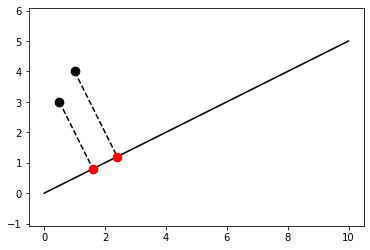

In [14]:
from skspatial.objects import Line
from skspatial.objects import Point
from skspatial.plotting import plot_2d


line = Line(point=[0, 0], direction=[2, 1])
point = Point([1, 4])
p2 = Point([0.5,3])

point_projected = line.project_point(point)
p2_projected = line.project_point(p2)
line_projection = Line.from_points(point, point_projected)
line2_projection = Line.from_points(p2,p2_projected)

_, ax = plot_2d(
    line.plotter(t_2=5, c='k'),
    line_projection.plotter(c='k', linestyle='--'),
    line2_projection.plotter(c='k', linestyle='--'),
    point.plotter(s=75, c='k'),
    point_projected.plotter(c='r', s=75, zorder=3),
    p2.plotter(s=75, c='k'),
    p2_projected.plotter(c='r', s=75, zorder=3),
)

ax.axis('equal')

print(point_projected)
print(p2_projected)

In [21]:
v = np.array([3,2])
u = np.array([0,0])
x = np.array([1,3])

c = np.dot((v-u), (x-u))/np.dot((v-u), (v-u))
print(c)
c*(v-u)

c = np.dot((u-v), (x-v))/np.dot((u-v), (u-v))
print(c)
c*(u-v)


0.6923076923076923
0.3076923076923077


array([-0.92307692, -0.61538462])